<a href="https://colab.research.google.com/github/sujeet311/Breastcancer/blob/main/Final_ensemble_2_7_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.offline as py
py.init_notebook_mode(connected=True)
df=pd.read_csv('/content/gdrive/MyDrive/project/final/cancer_data.csv')
print(df.shape)
df.head(5)


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.offline as py
py.init_notebook_mode(connected=True)
df=pd.read_csv('cancer_data.csv')
print(df.shape)
df.head(5)'''


"import pandas as pd \nimport numpy as np\nimport matplotlib.pyplot as plt # for data visualization\nimport seaborn as sns # for data visualization\nimport plotly.offline as py\npy.init_notebook_mode(connected=True)\ndf=pd.read_csv('cancer_data.csv')\nprint(df.shape)\ndf.head(5)"

In [3]:
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

In [4]:
#dropping null value feature like id
cancer_data = df.drop(['id','Unnamed: 32'],axis = 1)
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


convert maligant [M] to 1 and bengin [B] to 0

In [5]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1 , 'B':0})
cancer_data.head(5)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
B, M = cancer_data['diagnosis'].value_counts()
print("No. of malignant case [1]", M)
print("No. of Benign case [0]", B)


No. of malignant case [1] 212
No. of Benign case [0] 357


In [8]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
plt.figure(figsize = (16,5))

trace = go.Pie(labels = ['Benign','Malignant'], values = cancer_data['diagnosis'].value_counts(),
               textfont=dict(size=12), opacity = 0.8,
               marker=dict(colors=['lightgreen', 'white'],
                           line=dict(color='#000000', width=1.5)))


layout = dict(title ='Distribution of diagnosis variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

<Figure size 1600x500 with 0 Axes>

In [9]:
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
M = cancer_data.loc[cancer_data['diagnosis']==1]
M.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
B = cancer_data.loc[cancer_data['diagnosis']==0]
B.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


Irrelevant or partially relevant features can negatively impact the model performance. So, in order to achieve better accuracy for our model we identified the highly important features from the dataset by implementing a feature selection method i.e., Correlation Matrix with Heatmap.

Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
y = cancer_data['diagnosis']
X = cancer_data.iloc[:,1:]

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#Information gain
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply selectkbest algorithms
ordered_rank_features = SelectKBest(score_func=chi2,k=30)
ordered_features=ordered_rank_features.fit(X,y)

In [ ]:
ordered_features.scores_

array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01])

In [ ]:
pd.DataFrame(ordered_features.scores_,columns = ["score"] )
dfscores = pd.DataFrame(ordered_features.scores_,columns = ["score"] )
dfcolumns = pd.DataFrame(X.columns)
features_rank = pd.concat([dfcolumns,dfscores],axis=1)
features_rank_columns = ["Features","score"]
features_rank


,0,score
0,radius_mean,266.104917
1,texture_mean,93.897508
2,perimeter_mean,2011.102864
3,area_mean,53991.655924
4,smoothness_mean,0.149899
5,compactness_mean,5.403075
6,concavity_mean,19.712354
7,concave points_mean,10.544035
8,symmetry_mean,0.257380
9,fractal_dimension_mean,0.000074


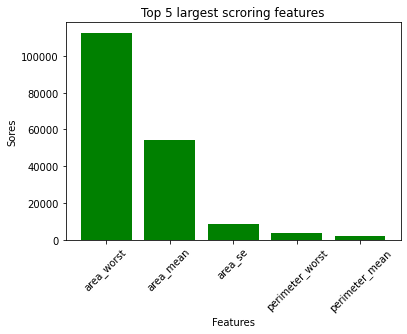

In [ ]:
dflv= features_rank.nlargest(5,'score')
dflv. to_csv(r"/content/gdrive/MyDrive/project/final/data.csv",index= False)
# Initialize the lists for X and Y
data = pd.read_csv('/content/gdrive/MyDrive/project/final/data.csv')

df1 = pd.DataFrame(data)

A= list(dflv.iloc[:, 0])
B = list(dflv.iloc[:, 1])

# Plot the data using bar() method
plt.bar(A, B, color='g')
plt.title("Top 5 largest scroring features")
plt.xlabel("Features")
plt.ylabel("Sores")
plt.xticks(rotation=45)
# Show the plot
plt.show()

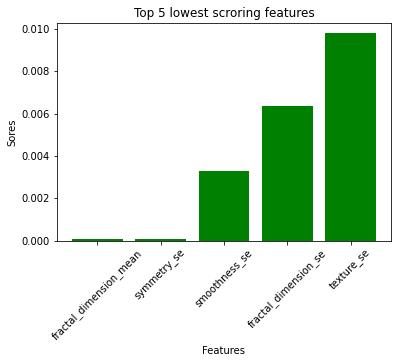

In [ ]:
dfsv =features_rank.nsmallest(5,'score')
dfsv. to_csv(r"/content/gdrive/MyDrive/project/final/data1.csv",index= False)
# Initialize the lists for X and Y
data = pd.read_csv('/content/gdrive/MyDrive/project/final/data1.csv')

df1 = pd.DataFrame(data)

A= list(dfsv.iloc[:, 0])
B = list(dfsv.iloc[:, 1])

# Plot the data using bar() method
plt.bar(A, B, color='g')
plt.title("Top 5 lowest scroring features")
plt.xlabel("Features")
plt.ylabel("Sores")
plt.xticks(rotation=45)
# Show the plot
plt.show()

###feature Importance
Feature Importance

This technique gives you a score for each feature of your data, the higher the score more relevant it is

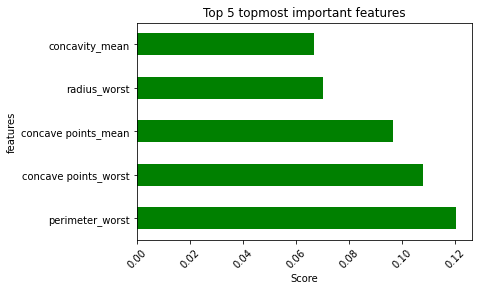

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(30)

ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(5).plot(kind='barh', color = 'g')

plt.title("Top 5 topmost important features")
plt.xlabel("Score")
plt.ylabel("features")
plt.xticks(rotation=45)
plt.show()

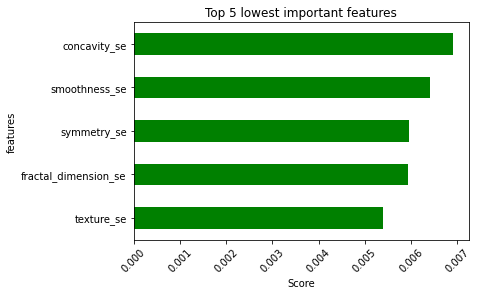

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nsmallest(5).plot(kind='barh',color='g')
plt.title("Top 5 lowest important features")
plt.xlabel("Score")
plt.ylabel("features")
plt.xticks(rotation=45)
plt.show()

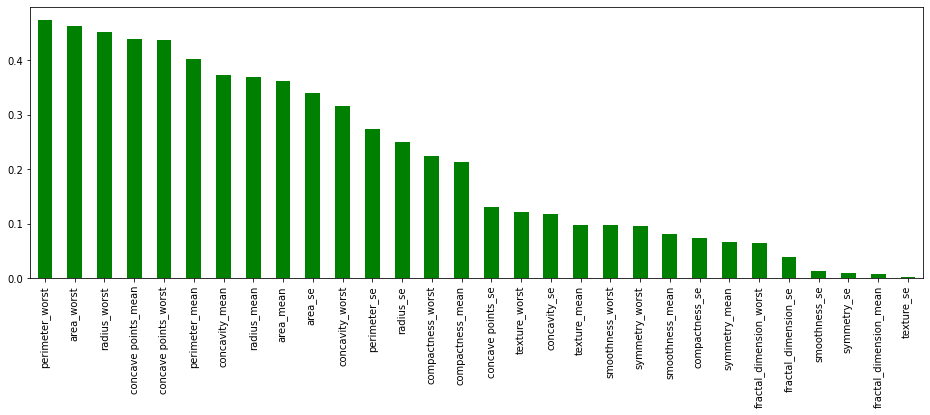

In [ ]:
#iormation gain
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize = (16,5))
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)

mutual_data.nlargest(30).plot(kind='bar', color = 'g')



These are the feature having less importance so it can be removed.

In [ ]:
to_drop = ["texture_se",'fractal_dimension_mean','symmetry_se','smoothness_se','fractal_dimension_se','symmetry_mean']
cancer_data = cancer_data.drop(to_drop,axis = 1)


In [ ]:
cancer_data.shape

(569, 25)

In [ ]:
cancer_data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.567134,0.556141,0.548236,0.292999,0.253730,0.408042,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.679090,0.674172,0.735864,0.206000,0.194204,0.376169,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.275869,0.281673,0.259845,0.191975,0.143293,0.163851,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.691765,0.693135,0.744983,0.250744,0.228082,0.407217,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.732562,0.726628,0.800086,0.212583,0.207660,0.372320,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.301467,0.296092,0.246552,0.318943,0.248396,0.380676,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.497473,0.548905,0.455653,0.738722,0.570517,0.642262,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.631925,0.660391,0.617427,0.670279,0.691270,0.683260,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.698050,0.710650,0.690299,0.490424,0.439167,0.615634,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_se,0.567134,0.679090,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,1.000000,0.972794,0.951830,0.356065,0.332358,0.513346,0.715065,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


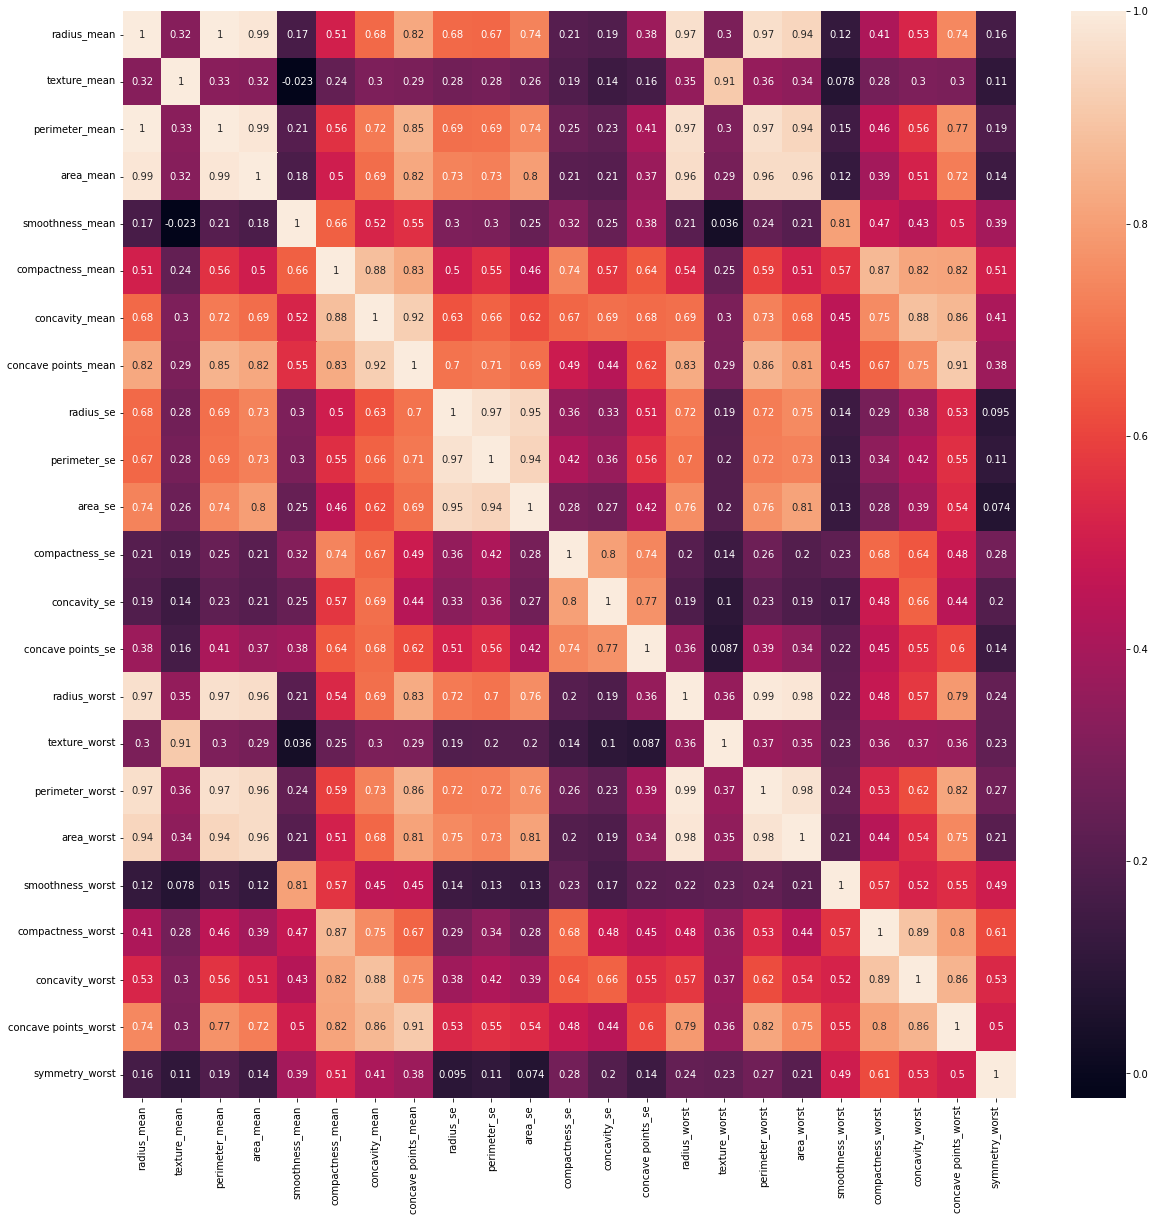

In [ ]:
import seaborn as sns

#corr=cancer_data.iloc[:,:-1].corr()
corr = cancer_data.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
corr.index

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [ ]:
threshold=0.9

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
  col_corr = set()  # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
  return col_corr


In [ ]:
correlation(cancer_data.iloc[:,:-1],threshold)

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [ ]:
# to drop
to_drop= ['radius_mean','perimeter_mean','radius_worst','perimeter_worst','radius_mean','perimeter_se','radius_se','concave points_mean','texture_worst','concavity_mean']
cancer_data1 = cancer_data.drop(to_drop,axis = 1)
cancer_data1.shape

(569, 16)

In [ ]:
cancer_data1.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

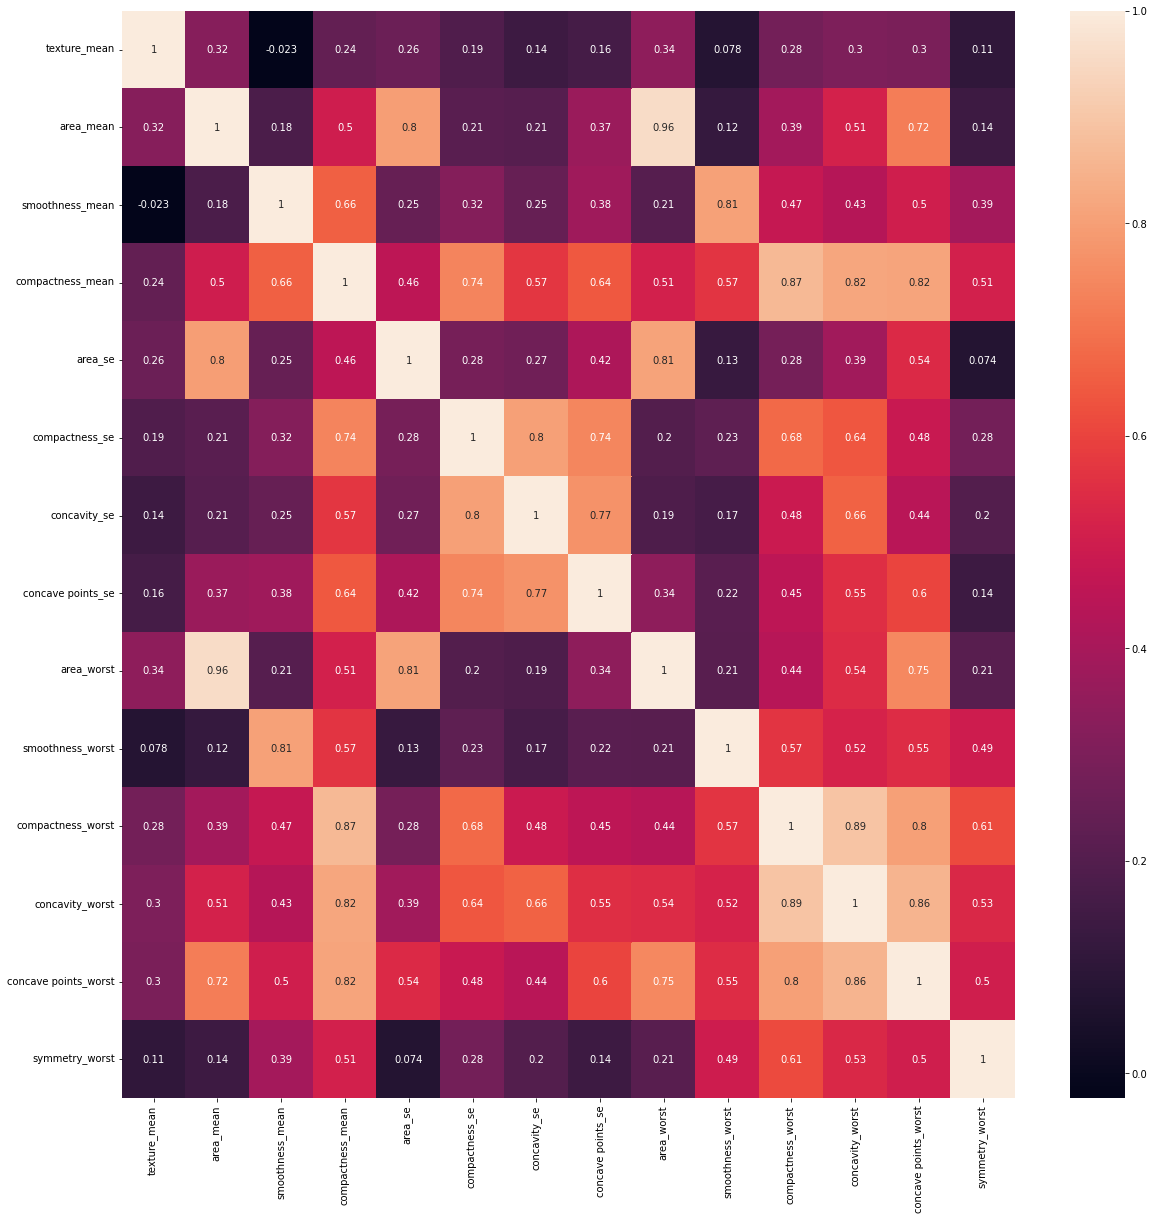

In [ ]:
plt.figure(figsize = (20,20))
#corr=cancer_data.iloc[:,:-1].corr()
corr=cancer_data1.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
y=cancer_data1['diagnosis'].values
X=cancer_data1.drop(['diagnosis'],axis=1).values

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)


In [ ]:
''''pca=PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)'''

"'pca=PCA(n_components=10)\npca.fit(X_train_std)\nX_train_pca=pca.transform(X_train_std)\nX_test_pca=pca.transform(X_test_std)\nprint(X_train_pca.shape)\nprint(X_test_pca.shape)"

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, roc_curve,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
##from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.metrics import log_loss
import itertools
from itertools import chain

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :
* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant
* false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :
* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)


In [ ]:
# Confusion matrix
def plot_confusion_matrix(cm, classe,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classe))
    plt.xticks(tick_marks, classe, rotation = 0)
    plt.yticks(tick_marks, classe)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Show metrics
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [ ]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## <a id='4.5'>4.5. Cross validation metrics</a>
Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it

In [ ]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    scaler=StandardScaler()

    X1 = scaler.fit_transform(X)
    for sc in scores:
        scores = cross_val_score(model, X1, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

Base learning models

Support vector machine

  
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       105
           M       0.95      0.94      0.95        66

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



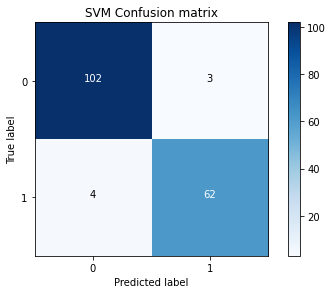

Accuracy  =     0.959
Precision =     0.954
Recall    =     0.939
F1_score  =     0.947


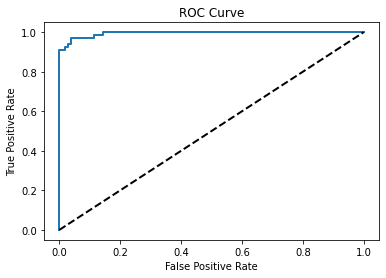

In [ ]:
from sklearn.svm import SVC
svc=SVC(random_state=42,probability=True)
svc.fit(X_train_std, y_train)
svc.score(X_test_std, y_test)
y_preds_svm = svc.predict(X_test_std)
target_names = ['B','M']
svc_accurracy = accuracy_score(y_test,y_preds_svm)

#print("y-score",y_score)
#print("Svm accuracy score:",svc_accurracy)
print('  ')
print(classification_report(y_test, y_preds_svm,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_svm)

# Confusion maxtrix & metrics

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='SVM Confusion matrix')
plt.savefig('SVM')
plt.show()

show_metrics()

# ROC curve
y_score = svc.decision_function(X_test_std)
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
svc=SVC(random_state=1,probability=True)
param_grid = {"C": [0.001,0.1,1,10], 'degree':[1,3,10]}
svc_cv=GridSearchCV(svc,param_grid=param_grid,cv = 3, n_jobs = -1, verbose = 0)
svc_cv.fit(X_train_std, y_train)
svc_cv.best_params_

{'C': 10, 'degree': 1}


              precision    recall  f1-score   support

           B       0.97      0.98      0.98       105
           M       0.97      0.95      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



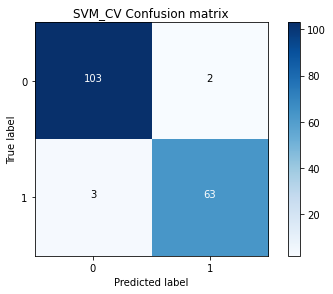

Accuracy  =     0.971
Precision =     0.969
Recall    =     0.955
F1_score  =     0.962


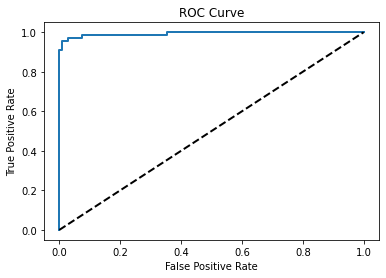

In [ ]:
svc_cv= SVC(random_state=1, C=10, degree=1, probability=True)
svc_cv.fit(X_train_std, y_train)
svc_cv.score(X_test_std, y_test)
y_preds_svc_cv = svc_cv.predict(X_test_std)
target_names = ['B','M']
svc_cv_accurracy = accuracy_score(y_test,y_preds_svc_cv)
#print("Svm_CV accuracy score:",svc_cv_accurracy)
print("")
print(classification_report(y_test, y_preds_svc_cv,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_svc_cv)

# Confusion maxtrix & metrics

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='SVM_CV Confusion matrix')
plt.savefig('SVM_CV')
plt.show()

show_metrics()

# ROC curve
y_score = svc_cv.decision_function(X_test_std)
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()


              precision    recall  f1-score   support

           B       0.98      0.98      0.98       105
           M       0.97      0.97      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



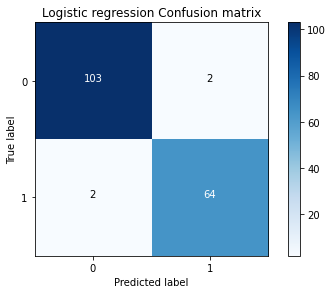

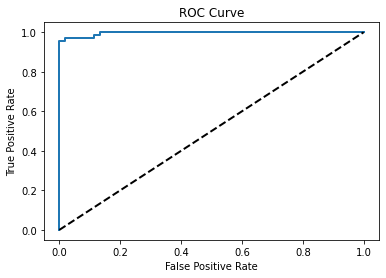

In [ ]:
logreg=LogisticRegression(random_state=1)
logreg.fit(X_train_std, y_train)
logreg.score(X_test_std, y_test)
t=time.time()
y_preds_logreg = logreg.predict(X_test_std)
target_names = ['B','M']
logreg_accurracy = accuracy_score(y_test,y_preds_logreg)
#print("logreg accuracy score:",logreg_accurracy)
print("")


print(classification_report(y_test, y_preds_logreg,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_logreg)

# Confusion maxtrix & metrics

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='Logistic regression Confusion matrix')
plt.savefig('Logreg')
plt.show()
# ROC curve
y_score = logreg.decision_function(X_test_std)
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()


              precision    recall  f1-score   support

           B       0.94      0.96      0.95       105
           M       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



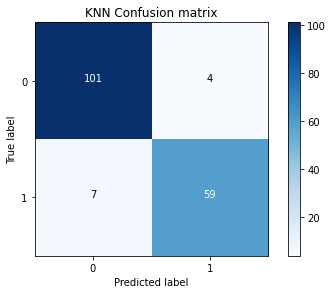

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)
y_preds_knn = knn.predict(X_test_std)
target_names = ['B','M']

knn_accurracy = accuracy_score(y_test,y_preds_knn)
#print("knn accuracy score:",knn_accurracy)
print("")

print(classification_report(y_test, y_preds_knn,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_knn)

# Confusion maxtrix & metrics

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='KNN Confusion matrix')
plt.savefig('KNN_CV')
plt.show()



In [ ]:
knn=KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 0)
knn_cv.fit( X_train_std, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 5}


knn_cv accuracy score: 0.935672514619883

              precision    recall  f1-score   support

           B       0.94      0.96      0.95       105
           M       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



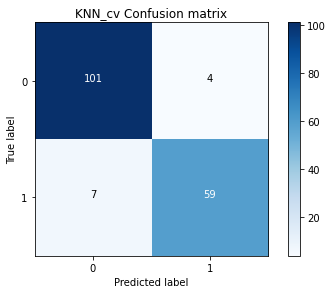

In [ ]:
knn_cv=KNeighborsClassifier(n_neighbors= 5)
knn_cv.fit(X_train_std, y_train)
knn_cv.score(X_test_std, y_test)
y_preds_knn_cv = knn_cv.predict(X_test_std)
target_names = ['B','M']

knn_cv_accurracy = accuracy_score(y_test,y_preds_knn_cv)
print("knn_cv accuracy score:",knn_cv_accurracy)
print("")

print(classification_report(y_test, y_preds_knn_cv,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_knn_cv)

# Confusion maxtrix & metrics

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='KNN_cv Confusion matrix')
plt.savefig('KNN_CV')
plt.show()




              precision    recall  f1-score   support

           B       0.95      0.93      0.94       105
           M       0.90      0.92      0.91        66

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



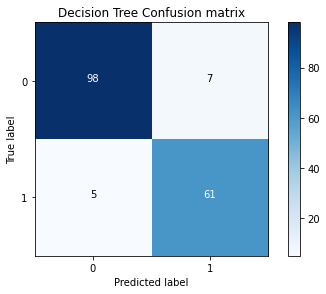

In [ ]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(X_train_std, y_train)
dt.score(X_test_std, y_test)
y_preds_dt = dt.predict(X_test_std)
target_names = ['B','M']

dt_accurracy = accuracy_score(y_test,y_preds_dt)
#print("decision tree accuracy score:",dt_accurracy)
print("")

print(classification_report(y_test, y_preds_dt,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_dt)
# Confusion maxtrix & metrics

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='Decision Tree Confusion matrix')
plt.savefig('DT')
plt.show()




              precision    recall  f1-score   support

           B       0.94      0.95      0.95       105
           M       0.92      0.91      0.92        66

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



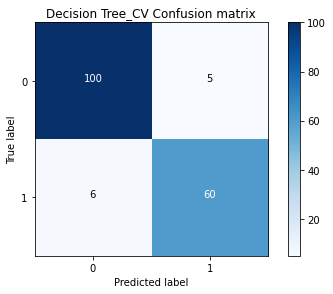

In [ ]:
classifierDT=DecisionTreeClassifier(criterion='gini', random_state=50, max_depth=3, min_samples_leaf=5)
classifierDT.fit(X_train,y_train)
classifierDT.score(X_test, y_test)
#print('Decision Tree LogLoss {score}'.format(score=log_loss(y_test, classifierDT.predict_proba(X_test))))
y_preds_dt_cv =  classifierDT.predict(X_test)
target_names = ['B','M']

dt_cv_accurracy = accuracy_score(y_test,y_preds_dt_cv)
#print("decision_CV tree accuracy score:",dt_cv_accurracy)
print("")

print(classification_report(y_test, y_preds_dt_cv,target_names=target_names))
cm = confusion_matrix(y_test, y_preds_dt_cv)


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='Decision Tree_CV Confusion matrix')
plt.savefig('DT_CV')
plt.show()





Majority Voting: Every base classifier makes a prediction for each test instance and the final output prediction is the one that receives the majority of votes.

Majority_voting tree accuracy score: 0.9824561403508771

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       105
           M       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



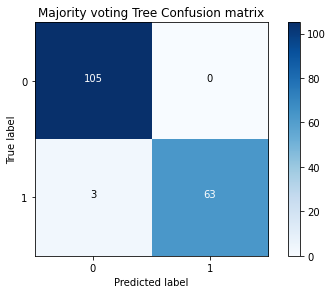

Confusion Matrix: 
 [[105   0]
 [  3  63]] 



In [ ]:
#create a dictionary of our models
estimators_hard=[('svm', svc_cv),('lr', logreg),('KNN', knn_cv)]
#create our voting classifier, inputting our models
majority_voting = VotingClassifier(estimators_hard, voting='hard')

majority_voting.fit(X_train_std ,y_train)

y_preds_maj = majority_voting.predict(X_test_std )

Majority_voting_accurracy = accuracy_score(y_test,y_preds_maj)
print("Majority_voting tree accuracy score:",Majority_voting_accurracy)
print("")


target_names = ['B','M']
print(classification_report(y_test, y_preds_maj,target_names=target_names))

cm = confusion_matrix(y_test, y_preds_maj)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='Majority voting Tree Confusion matrix')
plt.savefig('M_V')
plt.show()

print('Confusion Matrix: \n', cm, '\n')




In [ ]:
estimators_hard

[('svm', SVC(C=10, degree=1, probability=True, random_state=1)),
 ('lr', LogisticRegression(random_state=1)),
 ('KNN', KNeighborsClassifier())]

soft_voting tree accuracy score: 0.9766081871345029

              precision    recall  f1-score   support

           B       0.96      1.00      0.98       105
           M       1.00      0.94      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



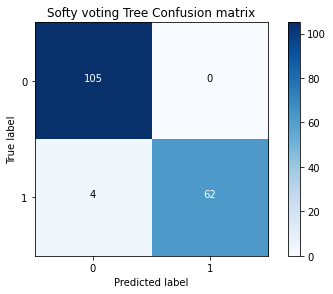

Confusion Matrix: 
 [[105   0]
 [  4  62]] 



In [ ]:
#Ensemble soft Voting Classifier
from sklearn.ensemble import VotingClassifier
estimators_soft=[('svm', svc_cv),('lr', logreg),('KNN', knn_cv)]
#create a dictionary of our models
soft_voting = VotingClassifier(estimators_soft, voting='soft')
#fit model to training data

soft_voting.fit(X_train_std ,y_train)

y_preds_soft = soft_voting.predict(X_test_std)

soft_voting_accurracy = accuracy_score(y_test,y_preds_soft)
print("soft_voting tree accuracy score:",soft_voting_accurracy)
print("")


target_names = ['B','M']
print(classification_report(y_test, y_preds_soft,target_names=target_names))

cm = confusion_matrix(y_test, y_preds_soft)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='Softy voting Tree Confusion matrix')
plt.savefig('S_V')
plt.show()

print('Confusion Matrix: \n', cm, '\n')




In [ ]:
#Ensemble Weighted average classifier
#finding the optimum weights

from scipy.optimize import minimize
predictions = []
clfs = ["svc_cv","logreg"," knn_cv"]
predictions.append(svc_cv.predict_proba(X_test_std))
predictions.append(logreg.predict_proba(X_test_std))
predictions.append(knn_cv.predict_proba(X_test_std))

def log_loss_func(weights):
 final_prediction = 0
 for weight, prediction in zip(weights, predictions):
     final_prediction += weight*prediction
 return log_loss(y_test, final_prediction)

#the algorithms need a starting value, right now we chose 0.5 for all weights
#its better to choose many random starting points and run minimize a few times
starting_values = [0.5]*len(predictions)

#adding constraints and a different solver
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

#our weights are bound between 0 and 1
bounds = [(0,1)]*len(predictions)
res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('ensamble score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

ensamble score: 0.0792417865400518
Best Weights: [5.55111512e-17 1.00000000e+00 9.71445147e-17]


In [ ]:
# evaluate each base model
def evaluate_models(models, X_train, X_test, y_train, y_test):
	# fit and evaluate the models
	scores = list()
	for name, model in models:
		# fit the model
		model.fit(X_train, y_train)
		# evaluate the model
		yhat = model.predict(X_test)
		acc = accuracy_score(y_test, yhat)
		# store the performance
		scores.append(acc)
		# report model performance
	return scores

In [ ]:
# fit and evaluate each model
models=[('svm', svc_cv),('lr', logreg),('KNN', knn_cv)]
scores = evaluate_models(models, X_train_std, X_test_std, y_train, y_test)
# create the ensemble
estimators_wt_avg=[('svm', svc_cv),('lr', logreg),('KNN', knn_cv)]
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)

In [ ]:
scores

[0.9707602339181286, 0.9766081871345029, 0.935672514619883]

In [ ]:
weight= [0.8,0.9,0.6]

Weighted average   accuracy score: 0.9883040935672515

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       105
           M       1.00      0.97      0.98        66

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



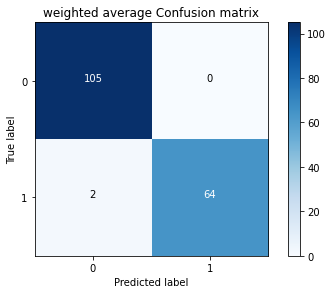

Confusion Matrix: 
 [[105   0]
 [  2  64]] 



In [ ]:
#Ensemble weighted average Classifier
from sklearn.ensemble import VotingClassifier
estimators_wt_avg=[('svm', svc_cv),('lr', logreg),('KNN', knn_cv)]
#create a dictionary of our models
wt_avg = VotingClassifier(estimators_wt_avg, voting='soft',weights=weight)
#fit model to training data

wt_avg.fit(X_train_std ,y_train)

y_preds_wt_avg = wt_avg.predict(X_test_std)

wt_avg_voting_accurracy = accuracy_score(y_test,y_preds_wt_avg)
print("Weighted average   accuracy score:",wt_avg_voting_accurracy)
print("")


target_names = ['B','M']
print(classification_report(y_test, y_preds_wt_avg,target_names=target_names))

cm = confusion_matrix(y_test, y_preds_wt_avg)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classe=class_names,
                      title='weighted average Confusion matrix')
plt.savefig('wt_avg')
plt.show()

print('Confusion Matrix: \n', cm, '\n')



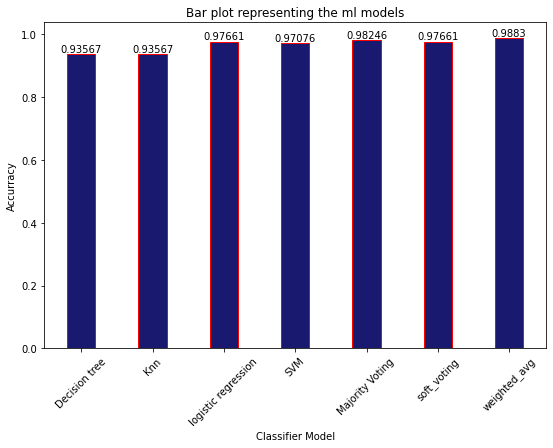

In [ ]:
plt.figure(figsize = (9,6))
classifier= ['Decision tree','Knn','logistic regression','SVM','Majority Voting','soft_voting','weighted_avg'  ]
accurracy = [round(dt_cv_accurracy,5),round(knn_cv_accurracy,5),round(logreg_accurracy,5),round(svc_cv_accurracy,5),round(Majority_voting_accurracy,5),round(soft_voting_accurracy,5),round(wt_avg_voting_accurracy,5)]
plt.bar(classifier,accurracy, width= 0.4, align='center',color='midnightblue', edgecolor = 'red')

for i in range(len(classifier)):
  plt.text(i,accurracy[i],accurracy[i],ha ="center", va = "bottom")

plt.title("Bar plot representing the ml models")
plt.xlabel('Classifier Model')
plt.ylabel('Accurracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Cross val Log
cross_dt_cv = cross_val_metrics(classifierDT)

[accuracy] : 0.93504 (+/- 0.03258)
[precision] : 0.94349 (+/- 0.03131)
[recall] : 0.87785 (+/- 0.06479)


In [ ]:
# Cross val Log
cross_knn_cv = cross_val_metrics(knn_cv)

[accuracy] : 0.95074 (+/- 0.01829)
[precision] : 0.95696 (+/- 0.03975)
[recall] : 0.91019 (+/- 0.02366)


In [ ]:
# Cross val Log

cross_log = cross_val_metrics(logreg)

[accuracy] : 0.97187 (+/- 0.00663)
[precision] : 0.97218 (+/- 0.02660)
[recall] : 0.95293 (+/- 0.01454)


In [ ]:
# Cross val Log
cross_svc_cv = cross_val_metrics(svc_cv)

[accuracy] : 0.97188 (+/- 0.00859)
[precision] : 0.97230 (+/- 0.02662)
[recall] : 0.95293 (+/- 0.02093)


In [ ]:
# Cross val Log
cross_majority = cross_val_metrics(majority_voting)

[accuracy] : 0.97364 (+/- 0.01110)
[precision] : 0.97706 (+/- 0.02892)
[recall] : 0.95293 (+/- 0.02093)


In [ ]:
# Cross val Log
cross_soft = cross_val_metrics(soft_voting)

[accuracy] : 0.97188 (+/- 0.01403)
[precision] : 0.97674 (+/- 0.02942)
[recall] : 0.94828 (+/- 0.02279)


In [ ]:
# Cross val Log
cross_avg_wt = cross_val_metrics(wt_avg)

[accuracy] : 0.97365 (+/- 0.01466)
[precision] : 0.98128 (+/- 0.02714)
[recall] : 0.94828 (+/- 0.02279)
